In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
fid = drive.ListFile({'q':"title='BDNRB.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('BDNRB.zip')
f.keys()
!unzip BDNRB.zip

Streaming output truncated to the last 5000 lines.
  inflating: BDNRB/train/063/311.jpg  
  inflating: BDNRB/train/063/312.jpg  
  inflating: BDNRB/train/063/314.jpg  
  inflating: BDNRB/train/063/315.jpg  
  inflating: BDNRB/train/063/316.jpg  
  inflating: BDNRB/train/063/319.jpg  
  inflating: BDNRB/train/063/320.jpg  
  inflating: BDNRB/train/063/326.jpg  
  inflating: BDNRB/train/063/327.jpg  
  inflating: BDNRB/train/063/328.jpg  
  inflating: BDNRB/train/063/329.jpg  
  inflating: BDNRB/train/063/330.jpg  
  inflating: BDNRB/train/063/331.jpg  
  inflating: BDNRB/train/063/338.jpg  
  inflating: BDNRB/train/063/339.jpg  
  inflating: BDNRB/train/063/340.jpg  
  inflating: BDNRB/train/063/341.jpg  
  inflating: BDNRB/train/063/343.jpg  
  inflating: BDNRB/train/063/344.jpg  
  inflating: BDNRB/train/063/345.jpg  
  inflating: BDNRB/train/063/346.jpg  
  inflating: BDNRB/train/063/347.jpg  
  inflating: BDNRB/train/063/349.jpg  
  inflating: BDNRB/train/063/350.jpg  
  inflating: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import numpy as np
from tensorflow import keras

import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

2.13.0


In [ ]:
train_dir = '/content/BDNRB/train'
validation_dir = '/content/BDNRB/validation'
test_dir = '/content/BDNRB/test'



BATCH_SIZE = 32
IMG_SIZE = (224, 224)

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)
test_dataset = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 24000 files belonging to 64 classes.
Found 4800 files belonging to 64 classes.
Found 3200 files belonging to 64 classes.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
    [
        layers.RandomContrast(factor=0.1),
        layers.RandomBrightness(factor=0.1),

        #layers.RandomZoom(height_factor=0.1, width_factor=0.1),

        #layers.RandomTranslation(height_factor=0.1, width_factor=0.1),  # Randomly translate images

    ]
)

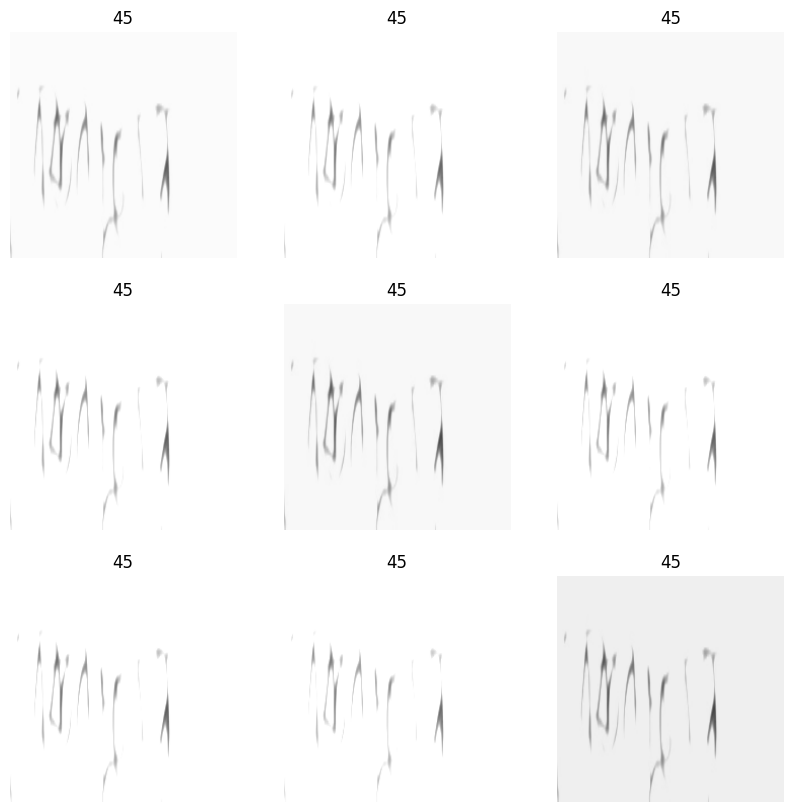

In [ ]:
import numpy as np

for images, labels in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    first_image = images[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(
            tf.expand_dims(first_image, 0), training=True
        )
        plt.imshow(augmented_image[0].numpy().astype("int32"))
        plt.title(int(labels[0]))
        plt.axis("off")

In [ ]:
import keras
from keras import layers
from keras.layers import BatchNormalization

nb_classes = 64

inputs = keras.Input(shape=(224, 224, 3))
x = layers.experimental.preprocessing.Rescaling(scale=1.0 / 255)(inputs)  # Rescale pixel values


#x = data_augmentation(x)


# Initial Convolution Layer
x = tf.keras.layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)
x =  (tf.keras.layers.BatchNormalization())(x)


# Convolution Block 1
x = (tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))(x)
x = (tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))(x)
x = (tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))(x)  # Add MaxPooling
x = (tf.keras.layers.BatchNormalization())(x)
x = (tf.keras.layers.Dropout(0.25))(x)


# Convolution Block 2
x = (tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))(x)
x = (tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))(x)
x = (tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))(x)  # Add MaxPooling
x = (tf.keras.layers.BatchNormalization())(x)
x = (tf.keras.layers.Dropout(0.25))(x)


# Convolution Block 3
x = (tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'))(x)
x = (tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'))(x)
x = (tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))(x)  # Add MaxPooling
x = (tf.keras.layers.BatchNormalization())(x)
x = (tf.keras.layers.Dropout(0.25))(x)


# Convolution Block 4
x = (tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu'))(x)
x = (tf.keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu'))(x)
x = (tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))(x)  # Add MaxPooling
x = (tf.keras.layers.BatchNormalization())(x)
x = (tf.keras.layers.Dropout(0.25))(x)

x = (tf.keras.layers.GlobalAveragePooling2D())(x)
x = (tf.keras.layers.Dense(512, activation='relu'))(x)
x = (tf.keras.layers.Dropout(0.5))(x)

outputs = layers.Dense(nb_classes, activation='softmax')(x)

model = keras.Model(inputs, outputs)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 112, 112, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 112, 112, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      36928     
                                                             

In [ ]:
callback=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=1e-4,
    patience=5,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(1e-3),  loss='sparse_categorical_crossentropy',metrics =['accuracy'])

In [ ]:
epochs = 100
history = model.fit(train_dataset, epochs=epochs, validation_data=validation_dataset) #,callbacks=[callback]

Epoch 1/100
750/750 [==============================] - 147s 157ms/step - loss: 2.1039 - accuracy: 0.4325 - val_loss: 2.4665 - val_accuracy: 0.3548
Epoch 2/100
750/750 [==============================] - 116s 155ms/step - loss: 0.2398 - accuracy: 0.9331 - val_loss: 0.7547 - val_accuracy: 0.8248
Epoch 3/100
750/750 [==============================] - 111s 148ms/step - loss: 0.0829 - accuracy: 0.9774 - val_loss: 0.2566 - val_accuracy: 0.9350
Epoch 4/100
750/750 [==============================] - 112s 150ms/step - loss: 0.0512 - accuracy: 0.9852 - val_loss: 0.2205 - val_accuracy: 0.9354
Epoch 5/100
750/750 [==============================] - 111s 148ms/step - loss: 0.0380 - accuracy: 0.9893 - val_loss: 0.1530 - val_accuracy: 0.9583
Epoch 6/100
750/750 [==============================] - 111s 147ms/step - loss: 0.0385 - accuracy: 0.9880 - val_loss: 1.9454 - val_accuracy: 0.6442
Epoch 7/100
750/750 [==============================] - 112s 149ms/step - loss: 0.0338 - accuracy: 0.9891 - val_loss: 0

In [ ]:
scores = model.evaluate(test_dataset)

100/100 [==============================] - 4s 37ms/step - loss: 5.8114e-09 - accuracy: 1.0000


In [ ]:
class_names = validation_dataset.class_names

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 58ms/step


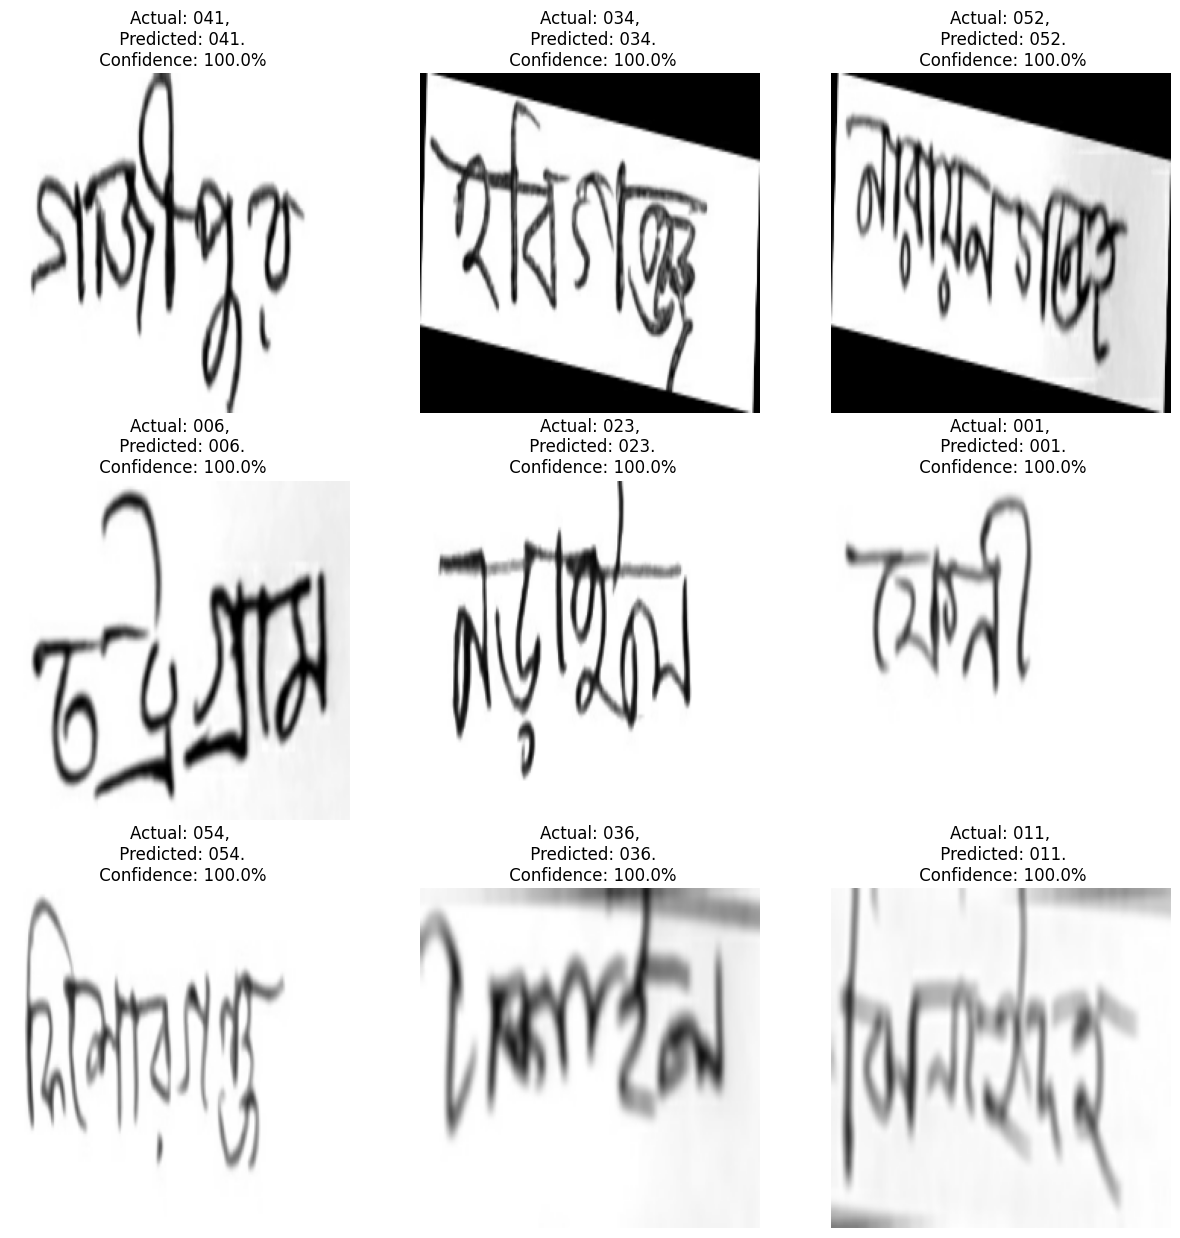

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in validation_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# Define the district to class mapping
district_to_class = {
    "comilla": 0,
    "Feni": 1,
    "Rangamati": 2,
    "Noakhali": 3,
    "Chandpur": 4,
    "Lakshmipur": 5,
    "Chittagong": 6,
    "kushtia": 7,
    "Magura": 8,
    "khulna": 9,
    "Bagerhat": 10,
    "Jhenaidah": 11,
    "Jhalokati": 12,
    "Patuakhali": 13,
    "Pirojpur": 14,
    "Rajbari": 15,
    "Madaripur": 16,
    "Lalmonirhat": 17,
    "Nilphamari": 18,
    "Gaibandha": 19,
    "Thakurgaon": 20,
    "Jessore": 21,
    "Dhaka": 22,
    "Narail": 23,
    "Rangpur": 24,
    "Pabna": 25,
    "bogura": 26,
    "Rajshahi": 27,
    "Natore": 28,
    "Barishal": 29,
    "Bhola": 30,
    "Barguna": 31,
    "Sylhet": 32,
    "Nauga": 33,
    "Habiganj": 34,
    "Pancigar": 35,
    "Tangail": 36,
    "Faridpur": 37,
    "Kurigram": 38,
    "Sherpur": 39,
    "Munshiganj": 40,
    "Gazipur": 41,
    "Joypurhat": 42,
    "Chapainawabganj": 43,
    "Moulvibazar": 44,
    "Cox's Bazar": 45,
    "Satkhira": 46,
    "Meherpur": 47,
    "Sunamganj": 48,
    "Chuaganda": 49,
    "Brahmanbaria": 50,
    "Shariatpur": 51,
    "Narayanganj": 52,
    "Gopalganj": 53,
    "Kishoreganj": 54,
    "Manikganj": 55,
    "Khagrachhari": 56,
    "Mymensingh": 57,
    "Narsingdi": 58,
    "Dinajpur": 59,
    "Netrokona": 60,
    "Sirajganj": 61,
    "Jamalpur": 62,
    "Bandarban": 63
}

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img.numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)
    return predicted_class, confidence

plt.figure(figsize=(15, 15))
for images, labels in validation_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        # Convert the predicted district name to its corresponding class index
        predicted_class_index = district_to_class.get(predicted_class, -1)

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class} (Class: {predicted_class_index}).\n Confidence: {confidence}%")

        plt.axis("off")

plt.show()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

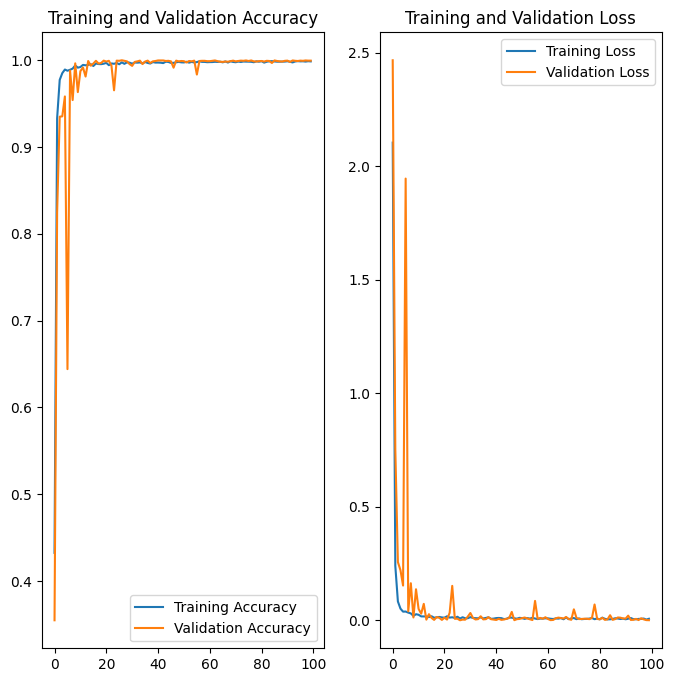

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 0s 29ms/step


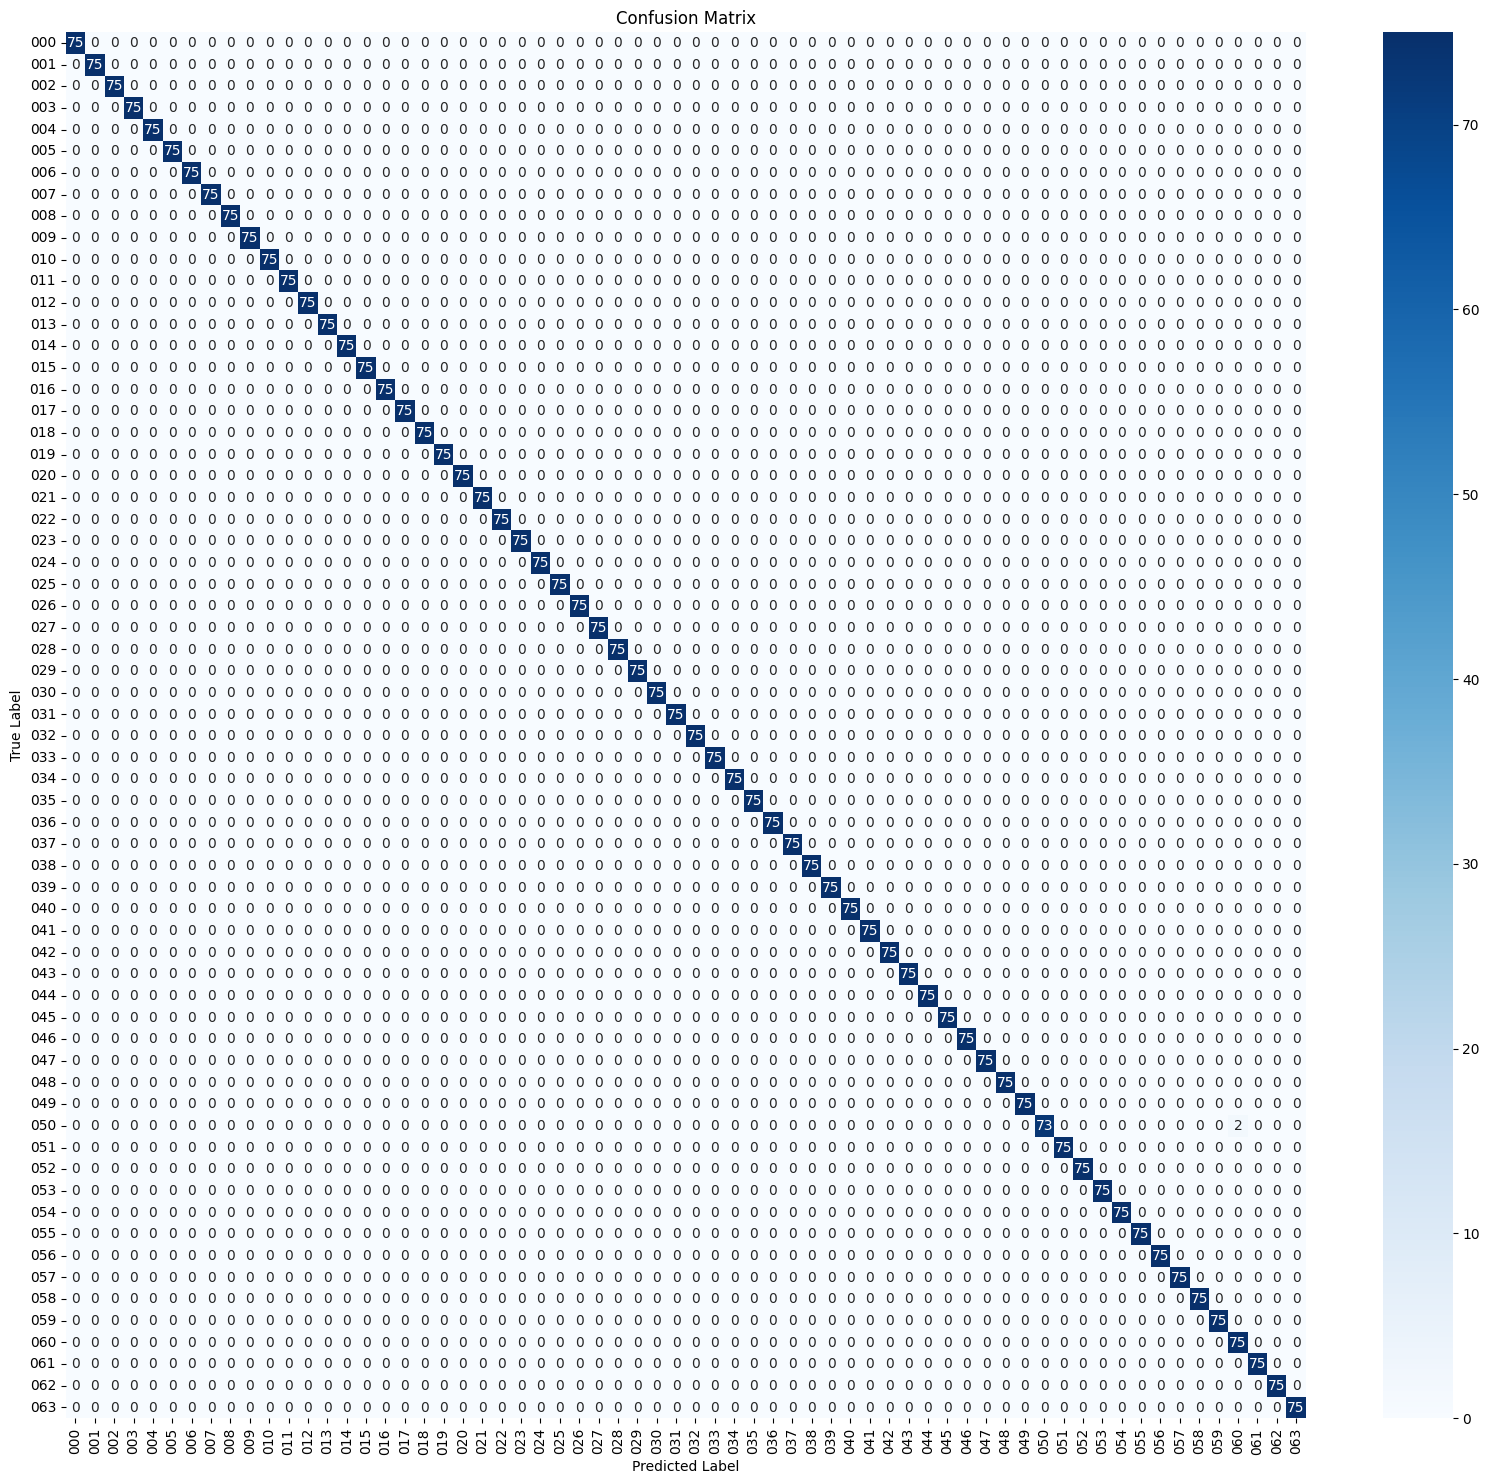

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
validation_dataset = test_dataset.unbatch().batch(1)  # Batch size = 1 for individual predictions

# Replace 'Class 0' and 'Class 1' with the actual class names from your dataset

# Create empty arrays to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the validation dataset to obtain true and predicted labels
for images, labels in validation_dataset:
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(labels.numpy())

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a heatmap using seaborn
plt.figure(figsize=(20, 18))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)

# Add a title and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()

1/1 [==============================] - 0s 32ms/step
F1 Score: 0.9995832592460883
Precision: 0.9995941558441559
Recall: 0.9995833333333333
ROC-AUC Score: 1.0


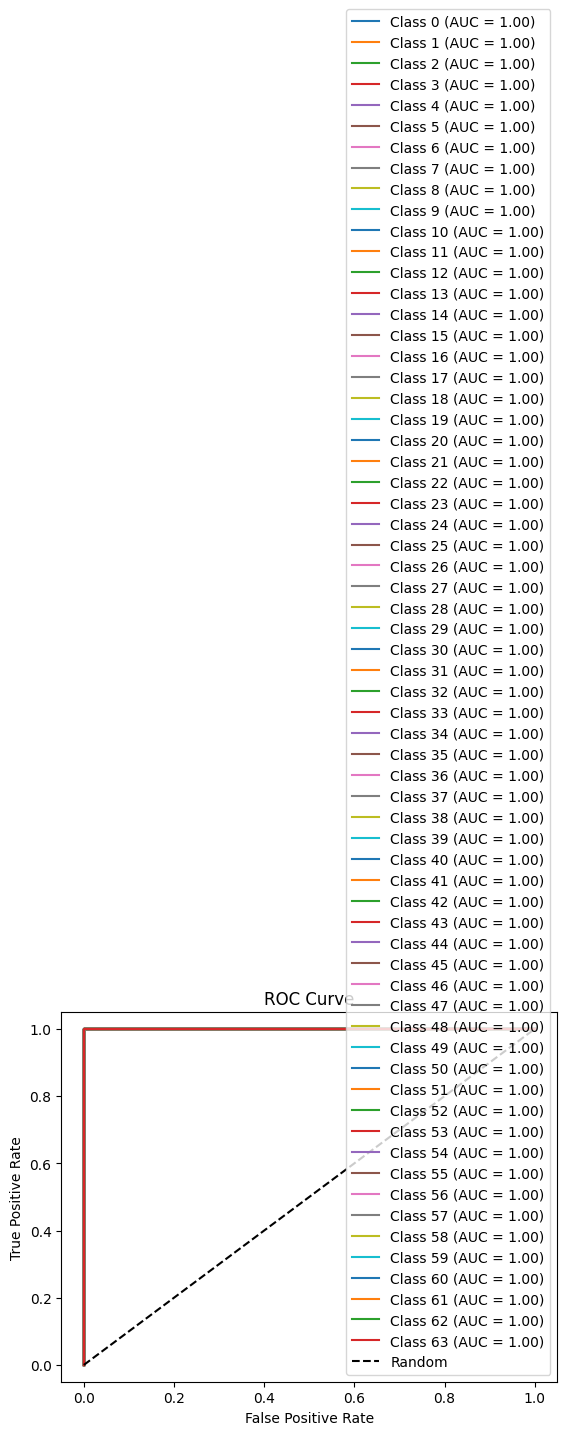

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt


# After model.fit(...)
validation_dataset = validation_dataset.unbatch().batch(1)  # Batch size = 1 for individual predictions

y_true = []
y_pred = []

for x_val, y_val in validation_dataset:
    y_true.append(y_val.numpy()[0])  # Append true labels
    y_pred.append(model.predict(x_val)[0])  # Append predicted probabilities (raw output)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the metrics
f1 = f1_score(y_true, y_pred_classes, average='macro')
precision = precision_score(y_true, y_pred_classes, average='macro')
recall = recall_score(y_true, y_pred_classes, average='macro')
roc_auc = roc_auc_score(y_true, y_pred, multi_class='ovo')

print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC-AUC Score: {roc_auc}")

# Plot ROC curves (only for binary classification or when using one-hot encoded labels)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(nb_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(nb_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
image_to_predict = [
    "/content/IMG_20230911_145613.jpg",
    "/content/IMG_20230911_145821 (1).jpg",
    "/content/IMG_20230911_145821 (2).jpg",
    "/content/IMG_20230911_145821.jpg",
    "/content/IMG_20230911_145613 - Copy.jpg",
    "/content/20230910_205908 (8).jpg",
    "/content/1.jpg",
    "/content/IMG_20230910_235140 (3).jpg",
    "/content/20230910_235243 (13).jpg",
    "/content/IMG_20230910_235140 (12).jpg",
    "/content/20230910_205850.jpg",
    "/content/20230910_210025 (14).jpg"





    ]
for imgi in image_to_predict:
  img = keras.utils.load_img(imgi, target_size=(224,224))
  ix = keras.utils.img_to_array(img)
  ix = np.expand_dims(ix, axis=0)
  prediction = model.predict(ix)
  cls = tf.argmax(prediction[0], axis=-1)
  print(prediction, cls)
  print(f'{class_names[cls]} --> {imgi}')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)